In [39]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


<a href="https://www.kaggle.com/code/apttemi/predicting-heart-disease-outcome?scriptVersionId=131892113" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassPredictionError

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Aim 

This project is aimed at predicting the risk of heart disease using clinical var

# Method

* Perform EDA on the dataset
* Preprocess the data and visualize
* Perform logistic regression

# EDA

In [41]:
#load the dataset
health_data = pd.read_csv('Heart_Disease_Prediction.csv')

In [42]:
health_data.shape

(270, 15)

In [43]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [44]:
health_data.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [45]:
# replace 'Presence' with '1' and 'Absence' with '0'
health_data['Heart Disease']=health_data['Heart Disease'].replace({'Presence':1, 'Absence':0})

print(health_data)

     index  Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  \
0        0   70    1                4  130          322             0   
1        1   67    0                3  115          564             0   
2        2   57    1                2  124          261             0   
3        3   64    1                4  128          263             0   
4        4   74    0                2  120          269             0   
..     ...  ...  ...              ...  ...          ...           ...   
265    265   52    1                3  172          199             1   
266    266   44    1                2  120          263             0   
267    267   56    0                2  140          294             0   
268    268   57    1                4  140          192             0   
269    269   67    1                4  160          286             0   

     EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0              2     109                0         

C:\Users\Arushi Dalmia\AppData\Local\Temp\ipykernel_12964\167886574.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health_data['Heart Disease']=health_data['Heart Disease'].replace({'Presence':1, 'Absence':0})


In [46]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [47]:
health_data.describe()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,134.500000,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,78.086491,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,67.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,134.500000,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,201.750000,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,269.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [48]:
#delete the index column
health_data = health_data.drop('index', axis=1)

In [49]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [50]:
#check for duplicates
duplicates = health_data.duplicated()
if duplicates.any():
    print("Duplicates found!")
    duplicate_rows = health_data[duplicates]
    print(duplicate_rows)
else:
    print("No duplicates found!")

No duplicates found!


In [51]:
#get the feature variables
features_variables = health_data.iloc[:, 0:13]
#get the outcome variables
outcome_variable = health_data.iloc[:, -1]

In [52]:
features_variables.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


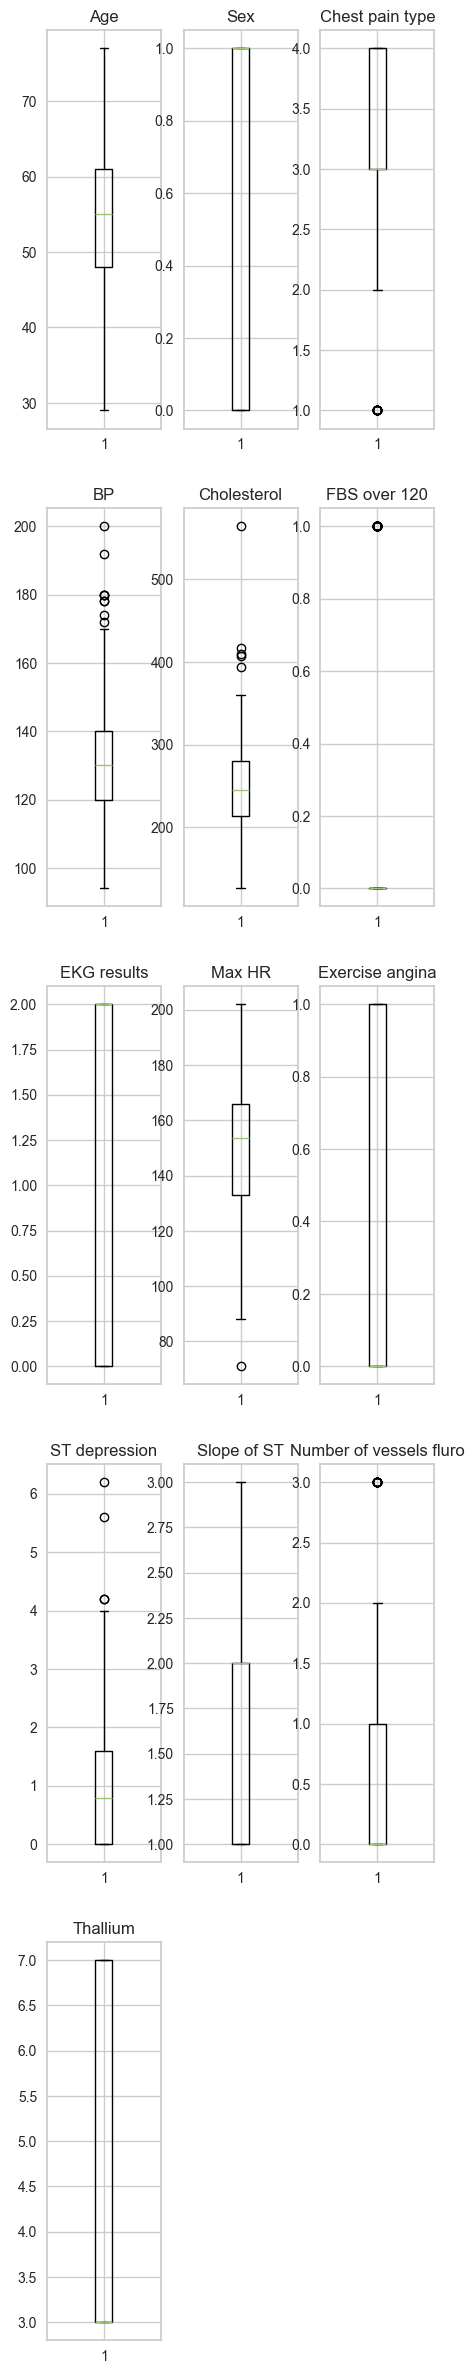

In [53]:
#plot the variables to check for outliers
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(5,30))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

for i, feature in enumerate(features_variables.columns):
    axs[i].boxplot(features_variables[feature])
    axs[i].set_title(feature)

# Remove any unused subplots
for j in range(len(features_variables.columns), len(axs)):
    fig.delaxes(axs[j])



# Display the plot
plt.show()

There are outliers in the dataset. This would be taken care of through scaling

In [54]:
hist_variables = health_data.iloc[:,[0,3,4,7,9]]

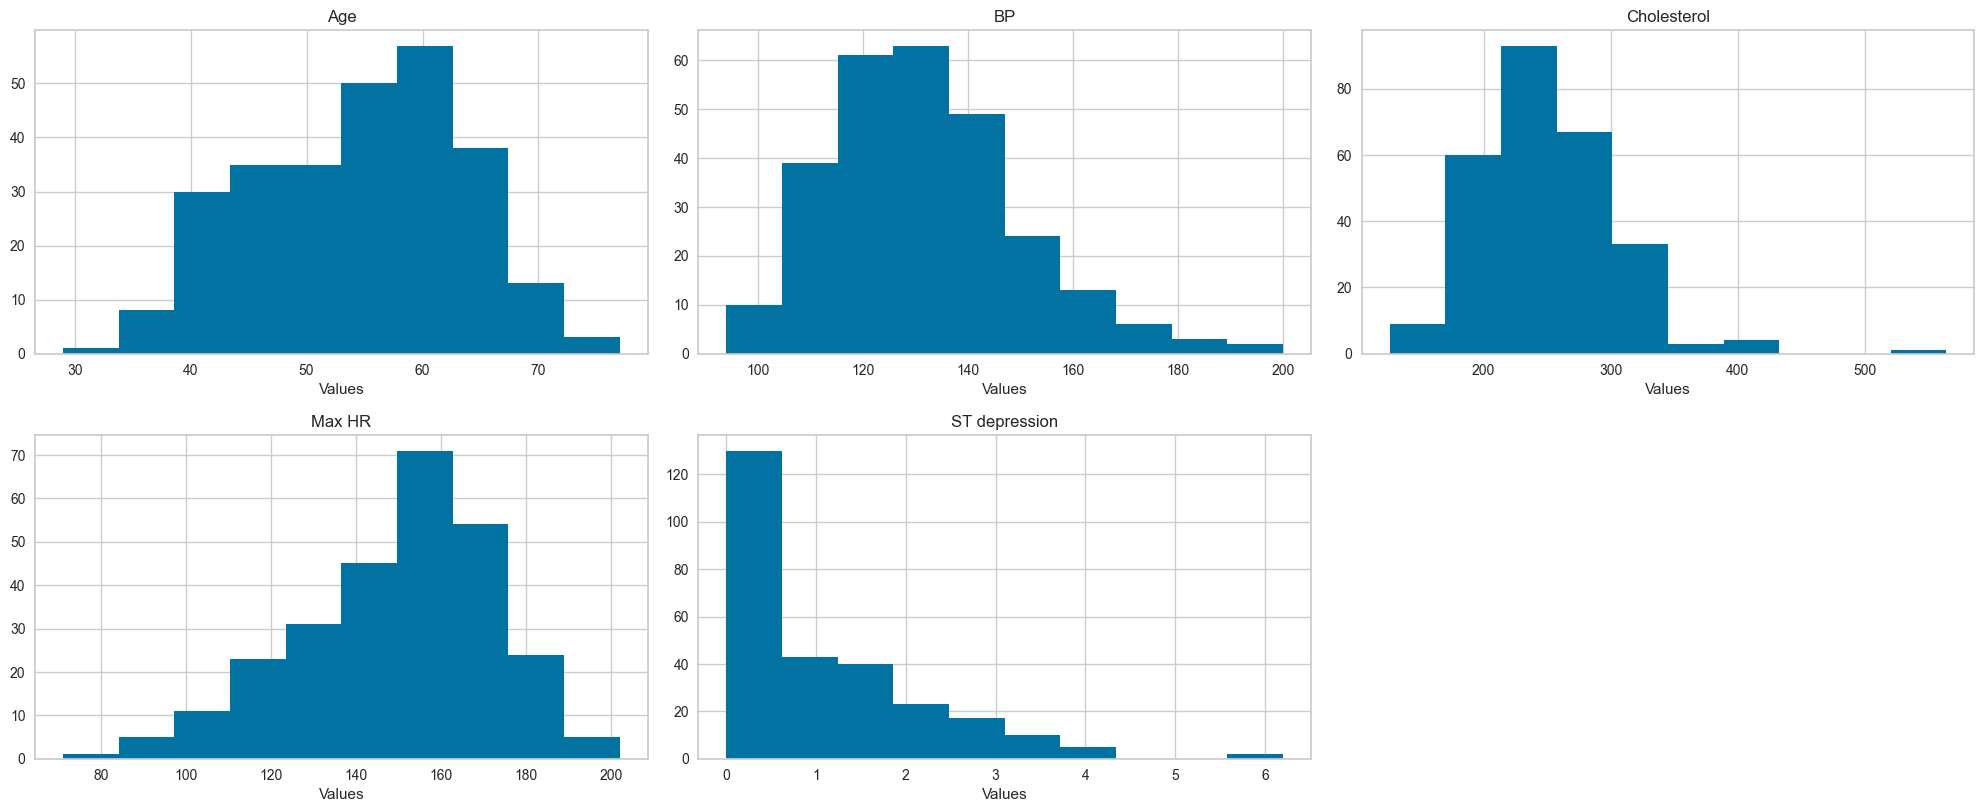

In [55]:
#plot the variables to test for normality for the continous variables
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

for i, feature in enumerate(hist_variables.columns):
    axs[i].hist(hist_variables[feature])
    axs[i].set_title(feature)
    axs[i].set_xlabel('Values')

# Remove any unused subplots
for j in range(len(hist_variables.columns), len(axs)):
    fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

In [56]:
#use shpairo-wilk test to test for normality

alpha = 0.05 #set significance level
for column in hist_variables.columns:
    column_data = hist_variables[column]
    statistic, p_value = shapiro(column_data)
    #print the test result for the current column
    print("Column:", column)
    print("Statistic:", statistic)
    print("p_value:", p_value)
    
    #check for normality per column
    if (p_value < alpha):
        print("The data does not follow normal distribution")
    else:
        print("The data follows normal distribution")
    print()

Column: Age
Statistic: 0.988294541182448
p_value: 0.027652344498684464
The data does not follow normal distribution

Column: BP
Statistic: 0.9649220685435019
p_value: 3.738946957055249e-06
The data does not follow normal distribution

Column: Cholesterol
Statistic: 0.943352957326989
p_value: 1.078633871092526e-08
The data does not follow normal distribution

Column: Max HR
Statistic: 0.9756821258344516
p_value: 0.00014503259275935065
The data does not follow normal distribution

Column: ST depression
Statistic: 0.8515619620060506
p_value: 2.102801511079569e-15
The data does not follow normal distribution



None of the continious variables are normally distributed

C:\Users\Arushi Dalmia\AppData\Local\Temp\ipykernel_12964\2021999459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = outcome_variable, data = health_data, palette=['red', 'black'])


<Axes: xlabel='Heart Disease', ylabel='count'>

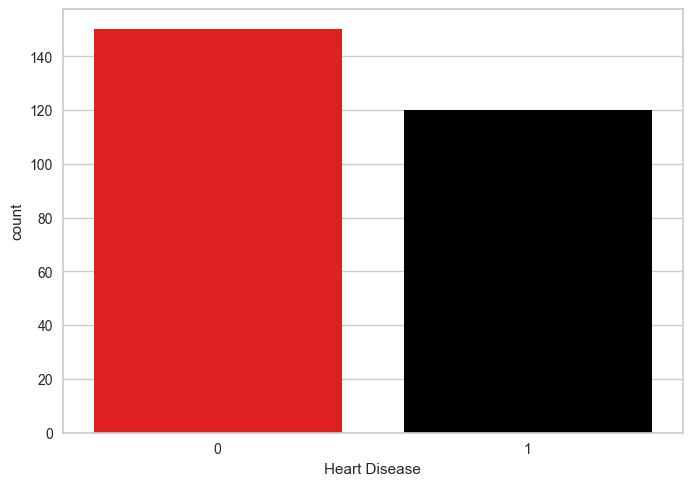

In [57]:
#plot the distribution of the categorical variables
sns.countplot(x = outcome_variable, data = health_data, palette=['red', 'black'])

Discussion: There are more patients without heart disease than without heart disease

In [58]:
noncat_variables = health_data.iloc[:,[1,2,5,6,8,10,11,12]]

In [59]:
noncat_variables

,Sex,Chest pain type,FBS over 120,EKG results,Exercise angina,Slope of ST,Number of vessels fluro,Thallium
0,1,4,0,2,0,2,3,3
1,0,3,0,2,0,2,0,7
2,1,2,0,0,0,1,0,7
3,1,4,0,0,1,2,1,7
4,0,2,0,2,1,1,1,3
...,...,...,...,...,...,...,...,...
265,1,3,1,0,0,1,0,7
266,1,2,0,0,0,1,0,7
267,0,2,0,2,0,2,0,3
268,1,4,0,0,0,2,0,6


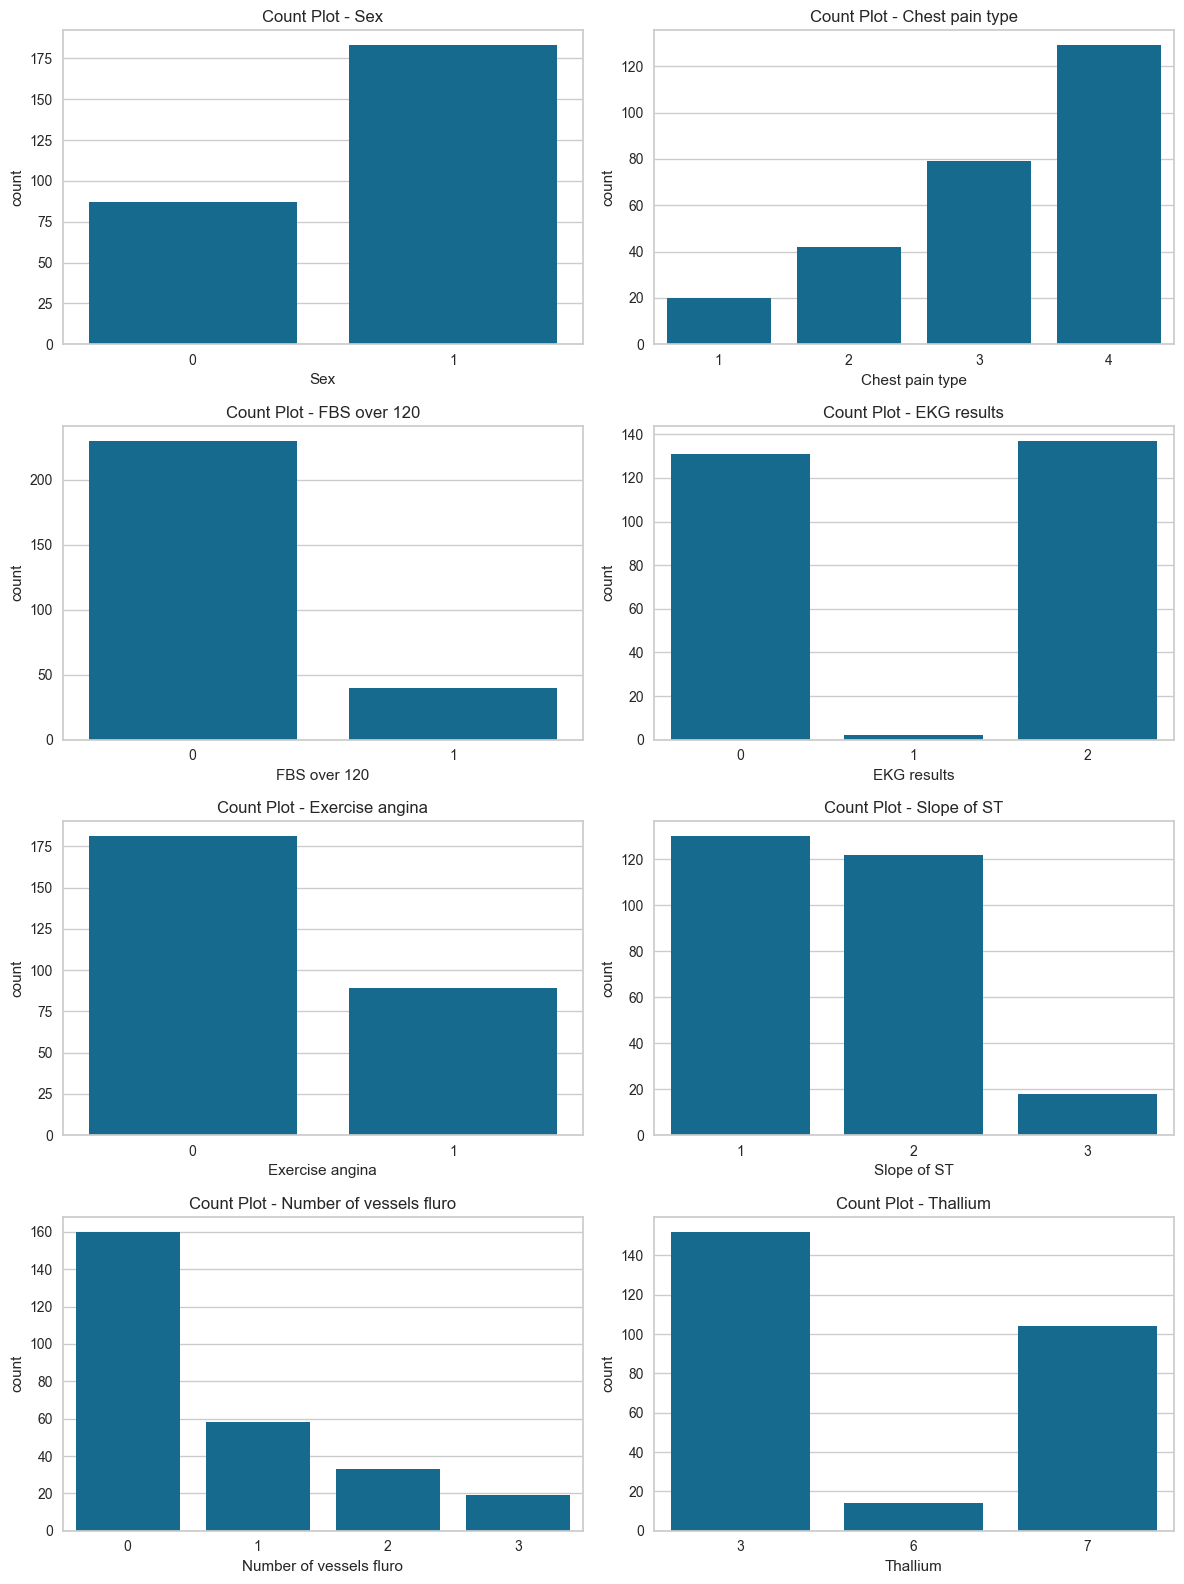

In [60]:
# Create subplots dynamically based on the number of columns
num_columns = len(noncat_variables.columns)
num_rows = (num_columns // 2) + (num_columns % 2)
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 4))

# Iterate over the columns and plot count plots
for i, column in enumerate(noncat_variables.columns):
    row = i // 2
    col = i % 2
    sns.countplot(x=column, data=health_data, ax=axes[row, col])
    axes[row, col].set_title(f'Count Plot - {column}')

# Remove any empty subplots
if num_columns % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()


Discussion: The other categorical variables are distributed into different categories per feature

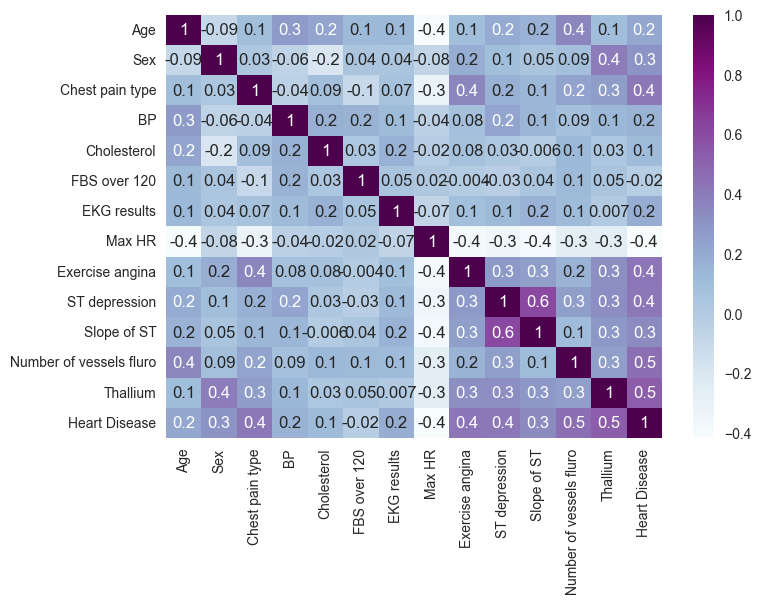

In [61]:
#check the correlation between the variables
column_corr = health_data.corr()
heatmap = sns.heatmap(column_corr, annot=True, cmap="BuPu", fmt='.1g')

Discussion: There is a moderate positive linear relationship between Thallium and heart disease and Number of vessels fluro and heart disease. There is a tendency for the variables to increase together, but not as strongly as in the case of a correlation coefficient of 1. It indicates that there is some degree of association between the variables, but it is not perfect.

# Logistic regression

In [62]:
X = health_data.iloc[:, :-1]  # Select all columns except the last one
y = health_data.iloc[:, -1]   # Select only the last colum

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a pipeline with scaling and logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression())

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Calculate the accuracy score on the testing data
score = pipe.score(X_test, y_test)

In [63]:
 # testing a prediction on the trained model
y_pred = pipe.predict(X_test)

In [64]:
 # testing a prediction on the trained model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8823529411764706


The accuracy of the model is 88% which is not bad 

In [65]:
 # evaluate the model using confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[37,  3],
       [ 5, 23]], dtype=int64)

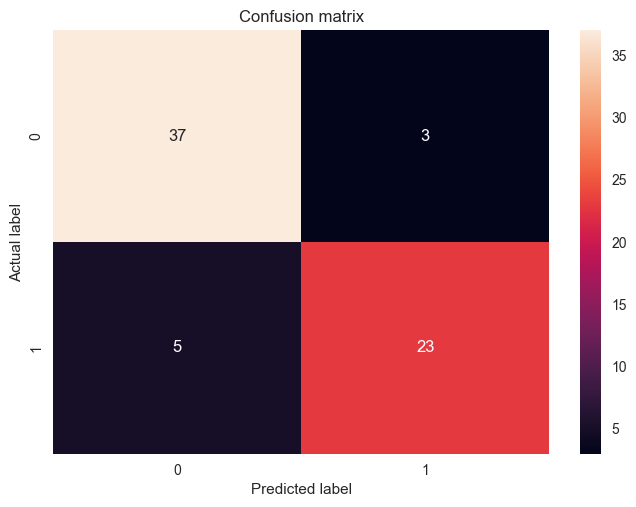

In [66]:
# Plot confusion matrix 
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(["red", "black"])
class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(cm, annot=True ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

Based on the confusion matrix the model has:
* 37 true positives (correctly predicted "Presence")
* 3 false positives (incorrectly predicted "Presence" when the actual value was "Absence")
* 5 false negatives (incorrectly predicted "Absence" when the actual value was "Presence")
* 23 true negatives (correctly predicted "Absence")

In [67]:
# evaluate the confusion matrix using classification report
target_names = ['Presence', 'Absence']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Presence       0.88      0.93      0.90        40
     Absence       0.88      0.82      0.85        28

    accuracy                           0.88        68
   macro avg       0.88      0.87      0.88        68
weighted avg       0.88      0.88      0.88        68



Discussion of the classification report:

* Precision: Precision measures the proportion of true positive predictions out of the total positive predictions. For the "Presence" class, the precision is 0.88, indicating that 88% of the predicted "Presence" instances are actually true "Presence" instances. For the "Absence" class, the precision is also 0.88, indicating that 88% of the predicted "Absence" instances are actually true "Absence" instances.

* Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of the total actual positive instances. For the "Presence" class, the recall is 0.93, indicating that 93% of the true "Presence" instances are correctly predicted as "Presence". For the "Absence" class, the recall is 0.82, indicating that 82% of the true "Absence" instances are correctly predicted as "Absence".

* F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance. For the "Presence" class, the F1-score is 0.90, and for the "Absence" class, the F1-score is 0.85. Higher F1-scores indicate better performance, considering both precision and recall.

* Support: Support refers to the number of instances in each class in the test set. For the "Presence" class, there are 40 instances, and for the "Absence" class, there are 28 instances.

* Accuracy: Accuracy measures the overall correctness of the model's predictions. In this case, the accuracy is 0.88, indicating that 88% of the instances in the test set are correctly classified.

* Macro Avg: Macro average calculates the average performance across all classes, giving equal weight to each class. The macro average precision, recall, and F1-score in this case are all 0.88.

* Weighted Avg: Weighted average calculates the average performance across all classes, taking into account the support (number of instances) for each class. The weighted average precision, recall, and F1-score in this case are all 0.88.

Overall, the classification report provides a comprehensive summary of the model's performance, highlighting precision, recall, F1-score, and support for each class, as well as overall accuracy and average metrics.

In [68]:
# improving the model accuracy using cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [69]:
# Define the number of folds (k)
k = 5

# Create a KFold object
kf = KFold(n_splits=k)

# Perform cross-validation
scores = cross_val_score(pipe, X, y, cv=kf)

In [70]:
# Print the scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.7962963  0.81481481 0.85185185 0.83333333 0.87037037]
Mean Score: 0.8333333333333334


The cross-validation accuracy reduced, so hyperparameter tuning will be done using GridSearch

In [71]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'logisticregression__C': [0.1, 1.0, 10.0],
    'logisticregression__penalty': ['l2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to predict on the test data
y_pred = grid_search.predict(X_test)

# Calculate the accuracy score
score = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and the accuracy score
print("Best Hyperparameters:", best_params)
print("Accuracy Score:", score)

Best Hyperparameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
Accuracy Score: 0.8823529411764706


In [72]:
# Create a new logistic regression model with the best hyperparameters
logreg = LogisticRegression(C=0.1, penalty='l2')

# Create a pipeline with scaling and the logistic regression model
pipe = make_pipeline(StandardScaler(), logreg)

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Use the fitted model to make predictions on the test data
y_pred = pipe.predict(X_test)

# Calculate the accuracy score
score = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy Score:", score)

Accuracy Score: 0.8823529411764706


With the suggested hyperparameters, the accuracy value did not improve